<a href="https://colab.research.google.com/github/beingshub02/Deep-Learning-Summer-School-IIITDM/blob/main/25DLS455_week2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Week 2 Day 3 Assignment**

**Practical Assignment – RNN for Temperature Prediction**

100%|██████████| 22.0k/22.0k [00:00<00:00, 14.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sumanthvrao/daily-climate-time-series-data/versions/3
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None

First few rows:
         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000


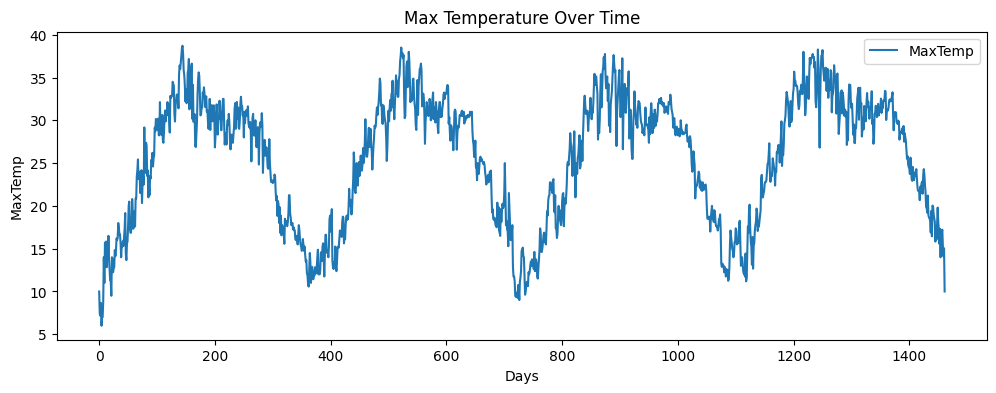

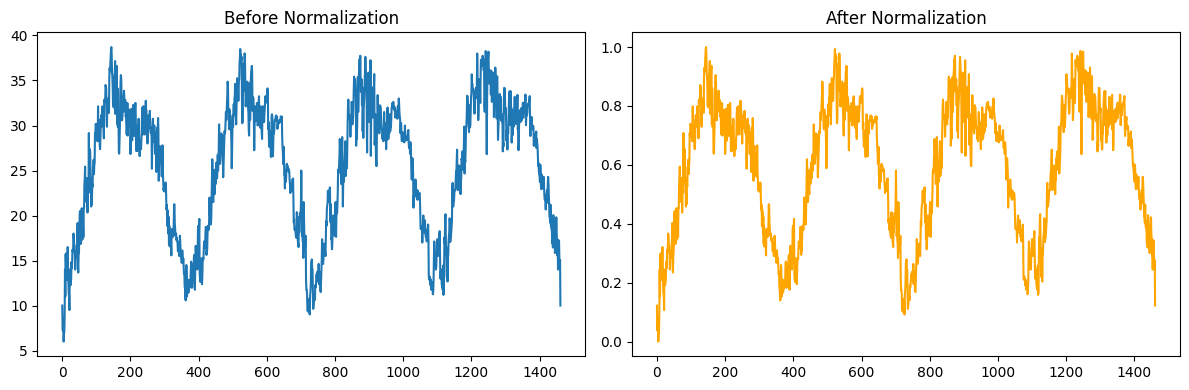

Input shape: (1432, 30, 1), Target shape: (1432, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1630 - val_loss: 0.0069
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0061 - val_loss: 0.0053
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0058 - val_loss: 0.0048
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0044 - val_loss: 0.0036
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0040 - val_loss: 0.0034
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0034 - val_loss: 0.0040
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0033 - val_loss: 0.0035
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0037 - val_loss: 0.0032
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0032 - val_loss: 0.0038


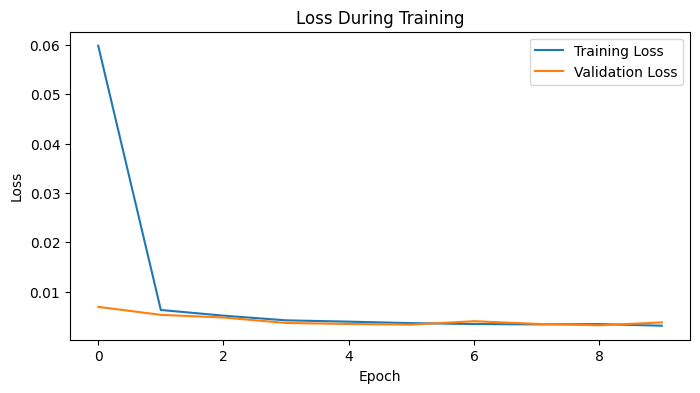

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


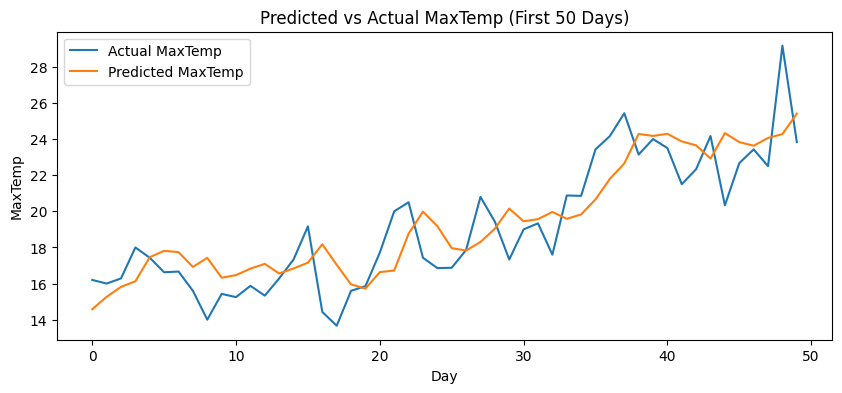

In [2]:
# Step 0: Install kagglehub if not already installed
# !pip install kagglehub

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import kagglehub
import os

# Step 1: Load & Inspect Data
# Download dataset using kagglehub
path = kagglehub.dataset_download("sumanthvrao/daily-climate-time-series-data")
print("Path to dataset files:", path)

# Load the correct CSV file
csv_path = os.path.join(path, "DailyDelhiClimateTrain.csv")
df = pd.read_csv(csv_path)

# Display info and first few rows
print("Data Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

# Plot MaxTemp over time
plt.figure(figsize=(12, 4))
plt.plot(df['meantemp'], label='MaxTemp')
plt.title("Max Temperature Over Time")
plt.xlabel("Days")
plt.ylabel("MaxTemp")
plt.legend()
plt.show()

# Step 2: Preprocess the Data
# Extract MaxTemp column
max_temp = df['meantemp'].values.reshape(-1, 1)

# Normalize
scaler = MinMaxScaler()
max_temp_scaled = scaler.fit_transform(max_temp)

# Plot before and after normalization
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(max_temp, label='Original MaxTemp')
plt.title("Before Normalization")
plt.subplot(1, 2, 2)
plt.plot(max_temp_scaled, label='Normalized MaxTemp', color='orange')
plt.title("After Normalization")
plt.tight_layout()
plt.show()

# Step 3: Create Sequences
def create_sequences(data, seq_length=30):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    x = np.array(x)
    y = np.array(y)
    return x, y

# Create sequences
sequence_length = 30
X, y = create_sequences(max_temp_scaled, sequence_length)

# Reshape X to (samples, 30, 1)
X = X.reshape((X.shape[0], X.shape[1], 1))

print(f"Input shape: {X.shape}, Target shape: {y.shape}")

# Step 4: Build & Compile RNN Model
model = Sequential([
    SimpleRNN(units=50, return_sequences=False, input_shape=(sequence_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()

# Step 5: Train the Model
history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

# Plot training and validation loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss During Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Step 6: Evaluate Model & Plot Predictions
# Predict on the entire dataset
predicted = model.predict(X)

# Inverse transform to get actual temperature values
predicted_temp = scaler.inverse_transform(predicted)
true_temp = scaler.inverse_transform(y.reshape(-1, 1))

# Plot first 50 predictions vs actual
plt.figure(figsize=(10, 4))
plt.plot(true_temp[:50], label='Actual MaxTemp')
plt.plot(predicted_temp[:50], label='Predicted MaxTemp')
plt.title("Predicted vs Actual MaxTemp (First 50 Days)")
plt.xlabel("Day")
plt.ylabel("MaxTemp")
plt.legend()
plt.show()
